---
# Data Science and Artificial Intelliegence Practicum
## 5-modul. Machine Learning
---

## 5.11 - Diabet kasalligiga tashxis qo'yish (Diabetes Classification)

**Vazifa:**
Quyidagi ma'lumotlar to'plami Hindistonning Qandli diabet va buyrak kasalliklari milliy institutidan olingan.
Maqsad diagnostik o'lchovlar asosida bemorda diabet bor-yo'qligini taxmin qilishdir.

**Tarkib:**
Dataset ichida barcha bemorlar kamida 21 yoshli ayollari.

**Ustunlar:**
- `Pregnancies`: homilador bo'lish soni
- `Glucose`: glyukozaga test natijasi
- `BloodPressure`: diastolik qon bosimi (mm Hg)
- `SkinThickness`: Triceps teri burmasining qalinligi (mm)
- `Insulin`: 2 soatlik sarum insulini (mu U/ml)
- `BMI`: Tana massasi indeksi (vazn kg / (m bo'yi) ^ 2)
- `DiabetesPedigreeFunction`: diabetning naslchilik funktsiyasi
- `Age`: Yosh (yil)
- `Outcome`: Class (0 - diabet yo'q, 1 - diabet)

**Dataset:** https://github.com/anvarnarz/praktikum_datasets/blob/main/diabetes.csv

---
- https://kaggle.com/competitions/diabetes-classification/
- https://kaggle.com/code/ahmetcankaraolan/diabetes-prediction-using-machine-learning/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_predict, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

### Data Exploration

In [2]:
df = pd.read_csv("https://github.com/anvarnarz/praktikum_datasets/blob/main/diabetes.csv?raw=True")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [5]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [6]:
df.corr().style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [7]:
df.corrwith(df['Outcome']).sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
dtype: float64

### Data Preprocessing

In [8]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

print(f'{X.shape=}')
print(f'{y.shape=}')

X.shape=(768, 8)
y.shape=(768,)


In [9]:
# Scaling
X = StandardScaler().fit_transform(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(f'{X_train.shape=}')
print(f'{y_train.shape=}')
print(f'{X_test.shape=}')
print(f'{y_test.shape=}')

X_train.shape=(614, 8)
y_train.shape=(614,)
X_test.shape=(154, 8)
y_test.shape=(154,)


### Machine Learning

In [11]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [12]:
y_pred = knn.predict(X_test)

### Evaluation

In [13]:
print(f"Mean Accuracy = {knn.score(X_test, y_test)}")

Mean Accuracy = 0.7597402597402597


In [14]:
print(f"Jaccard score:\n{metrics.jaccard_score(y_test, y_pred)}")

Jaccard score:
0.4393939393939394


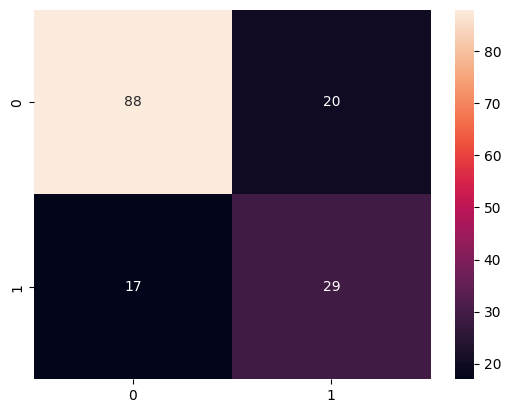

In [15]:
# Confusion Matrix
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True);

In [16]:
print("Classification Report:\n", metrics.classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.81      0.83       108
           1       0.59      0.63      0.61        46

    accuracy                           0.76       154
   macro avg       0.71      0.72      0.72       154
weighted avg       0.76      0.76      0.76       154



**Cross validation**

In [17]:
cv_predict = cross_val_predict(estimator=knn, X=X, y=y, cv=5)
# Evaluating the model
print(metrics.classification_report(y, cv_predict))

              precision    recall  f1-score   support

           0       0.78      0.83      0.80       500
           1       0.64      0.55      0.59       268

    accuracy                           0.73       768
   macro avg       0.71      0.69      0.70       768
weighted avg       0.73      0.73      0.73       768



#### with `GridSearchCV`

In [18]:
param_grid = {'n_neighbors': range(1, 35)}
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 35)})

In [19]:
knn_gscv.best_params_

{'n_neighbors': 17}

In [20]:
knn_gscv.best_score_

0.7669892199303965

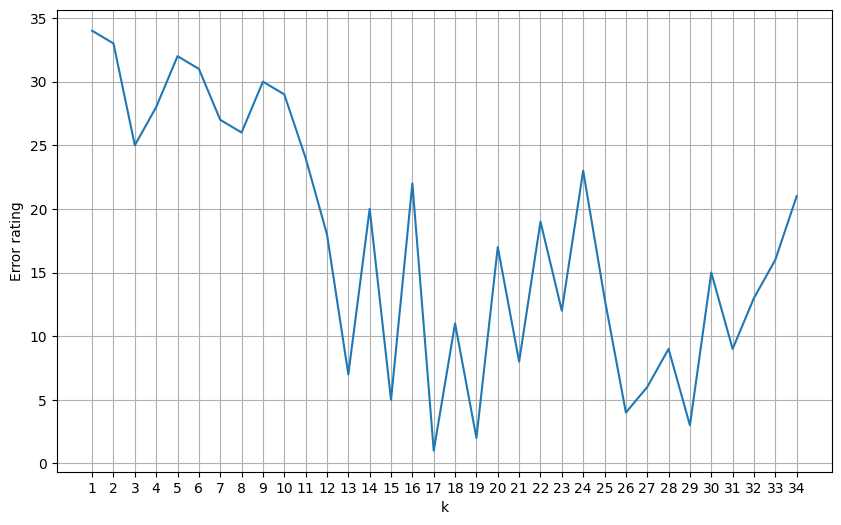

In [21]:
plt.figure(figsize=[10, 6])
plt.plot(param_grid['n_neighbors'], knn_gscv.cv_results_['rank_test_score'])
plt.xticks(param_grid['n_neighbors'])
plt.xlabel("k")
plt.ylabel("Error rating")
plt.grid()
plt.show()

In [22]:
knn_gscv.score(X_test, y_test)

0.7662337662337663

---
**Here are some steps you can take to improve the accuracy of your diabetes classification model:**

- Feature engineering: Look for additional features or combinations of features that might better predict diabetes. Consider including interactions between variables or transforming variables (e.g. taking the square root or logarithm of a feature). You could also try adding new features, such as body mass index (BMI) or insulin resistance.

- Model selection: Consider trying other classification algorithms besides KNN, such as logistic regression, decision trees, or support vector machines (SVM). Each algorithm has its strengths and weaknesses, so trying a variety of algorithms could lead to improved performance.

- Hyperparameter tuning: Experiment with different hyperparameters of the KNN model, such as the number of neighbors (k) or the distance metric. Try using cross-validation to find the optimal values of these hyperparameters.

- Ensemble methods: Try combining multiple models to improve accuracy. For example, you could try using a voting classifier that combines the predictions of multiple models.

- Data preprocessing: Consider scaling or normalizing the features to make sure they are on the same scale. This can help the algorithm converge faster and improve accuracy.

- Data augmentation: If you have a small dataset, consider using data augmentation techniques such as rotating, flipping or adding noise to your images.

- Imbalanced dataset: If your dataset is imbalanced, meaning one class has significantly more samples than the other class, consider using techniques such as oversampling the minority class or undersampling the majority class.
---